In [ ]:
#!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 8.0 MB/s 
  Using cached numpy-1.19.5-cp38-cp38-manylinux2010_x86_64.whl (14.9 MB)
     |████████████████████████████████| 125 kB 52.6 MB/s 
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.2
    Uninstalling Jinja2-3.1.2:
      Successfully uninstalled Jinja2-3.1.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.0
    Uninstalling numpy-1.20.0:
      Successfully uninstalled numpy-1.20.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jaxlib 0.3.25+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
jax 0.3.25 requires numpy>=1.20, but you have 

# Abstract:
Employee attrition is downsizing in any organization where employees resign. Employees are valuable assets of any organization. It is necessary to know whether the employees are dissatisfied or whether there are other reasons for leaving their respective jobs.

Nowadays, for better opportunities, employees are eager to move from one organization to another. But if they quit their jobs unexpectedly, it can result in a huge loss for the organization. A new hire will consume money and time, and newly hired employees will also take time to make the respective organization profitable.

Retaining skilled and hardworking employees is one of the most critical challenges many organizations face. Therefore, by improving employee satisfaction and providing a desirable working environment, we can certainly reduce this problem significantly.

# Combine Data Cleaning, Feature Selection, Modeling, and Interpretability into one report (Every assignment except TMINST) and make it a cohesive readable report.

 
The focus is readability and clarity.

 
The following must be answered:

1. What is the question?

2. What did you do?

3. How well did it work?

4. What did you learn?

In [ ]:
#!pip install shap
#!pip install numpy==1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.20.0-cp38-cp38-manylinux2010_x86_64.whl (15.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.0 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.8 which is incompatible.
eli5 0.13.0 requires jinja2>=3.0.0, but you have jinja2 2.11.3 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Importing Packages
import seaborn as sns
import math 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format 
from scipy.stats import norm, skew #for some statistics
from scipy import stats
from sklearn.preprocessing import StandardScaler


# Reading Data

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Employee.csv to Employee (1).csv


In [ ]:
employee_fut = pd.read_csv("/content/Employee.csv")

# Data Profile

In [ ]:
employee_fut.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


# Describing Data set

In [ ]:
employee_fut.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


# DataTypes

In [ ]:
#DataTypes
employee_fut.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

Both numerical and categorial data types are present in the data set.


In [ ]:
#Missing_Values
employee_fut.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [ ]:
employee_fut.Education.unique()

array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [ ]:
employee_fut.Education.isna().sum()

0

In [ ]:
employee_fut.Education

0       Bachelors
1       Bachelors
2       Bachelors
3         Masters
4         Masters
          ...    
4648    Bachelors
4649      Masters
4650      Masters
4651    Bachelors
4652    Bachelors
Name: Education, Length: 4653, dtype: object

In [ ]:
employee_fut = pd.get_dummies(employee_fut)

In [ ]:
employee_fut.dtypes

JoiningYear                  int64
PaymentTier                  int64
Age                          int64
ExperienceInCurrentDomain    int64
LeaveOrNot                   int64
Education_Bachelors          uint8
Education_Masters            uint8
Education_PHD                uint8
City_Bangalore               uint8
City_New Delhi               uint8
City_Pune                    uint8
Gender_Female                uint8
Gender_Male                  uint8
EverBenched_No               uint8
EverBenched_Yes              uint8
dtype: object

# Changing data type from uint to int



In [ ]:
#changing data type from uint to int:
employee_fut['Education_Bachelors']=employee_fut['Education_Bachelors'].astype(int)
employee_fut['Education_Masters']=employee_fut['Education_Masters'].astype(int)
employee_fut['Education_PHD']=employee_fut['Education_PHD'].astype(int)
employee_fut['City_Bangalore']=employee_fut['City_Bangalore'].astype(int)
employee_fut['City_New Delhi']=employee_fut['City_New Delhi'].astype(int)
employee_fut['City_Pune']=employee_fut['City_Pune'].astype(int)
employee_fut['EverBenched_No']=employee_fut['EverBenched_No'].astype(int)
employee_fut['EverBenched_Yes']=employee_fut['EverBenched_Yes'].astype(int)
employee_fut['Gender_Male']=employee_fut['Gender_Male'].astype(int)
employee_fut['Gender_Female']=employee_fut['Gender_Female'].astype(int)

In [ ]:
employee_fut.dtypes

JoiningYear                  int64
PaymentTier                  int64
Age                          int64
ExperienceInCurrentDomain    int64
LeaveOrNot                   int64
Education_Bachelors          int64
Education_Masters            int64
Education_PHD                int64
City_Bangalore               int64
City_New Delhi               int64
City_Pune                    int64
Gender_Female                int64
Gender_Male                  int64
EverBenched_No               int64
EverBenched_Yes              int64
dtype: object

In [ ]:
employee_fut_new= employee_fut.copy()

# NUMERICAL VARIABLES

<Figure size 576x360 with 0 Axes>

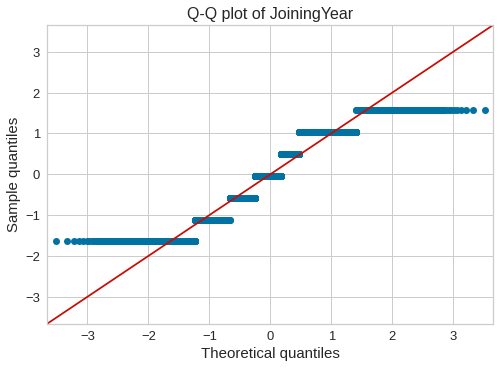

<Figure size 576x360 with 0 Axes>

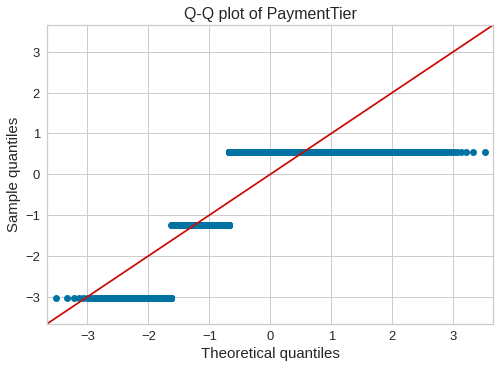

<Figure size 576x360 with 0 Axes>

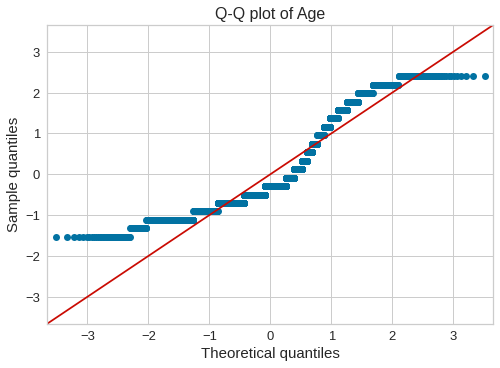

<Figure size 576x360 with 0 Axes>

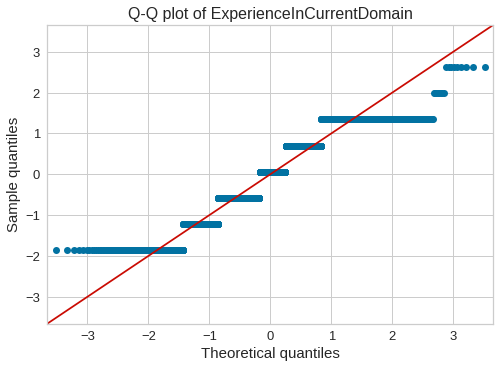

In [ ]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=employee_fut[['JoiningYear', 'PaymentTier', 'Age' , 'ExperienceInCurrentDomain']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

# Checking the Ranges of the predictor variables and dependent variable

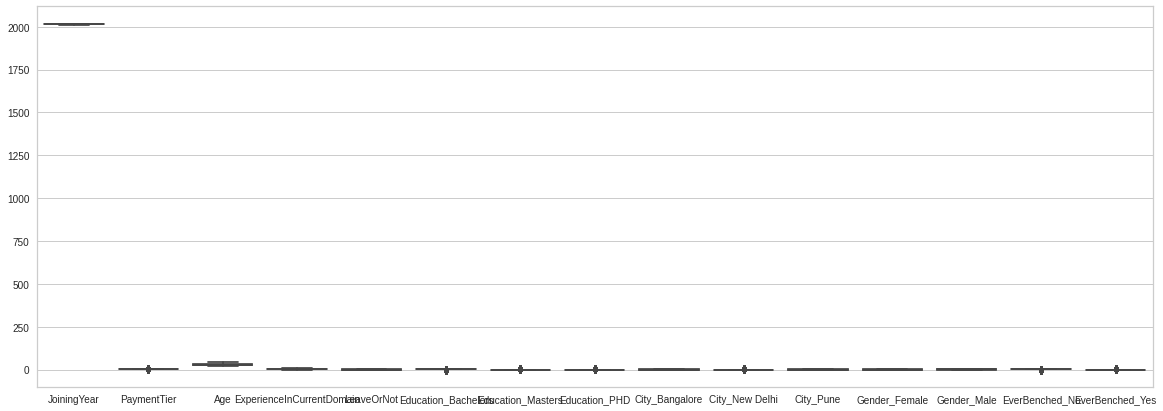

In [ ]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data= employee_fut)


#Checking the correlation between all the features in the data

In [ ]:
#checking the correlation between all the features in the data
employee_fut.corr()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
JoiningYear,1.000000,-0.096078,0.013165,-0.036525,0.181705,-0.178347,0.191759,-0.001362,-0.104668,0.141744,-0.020167,0.012213,-0.012213,-0.049353,0.049353
PaymentTier,-0.096078,1.000000,0.007631,0.018314,-0.197638,0.180820,-0.199632,0.011966,0.293730,-0.102642,-0.229910,-0.235119,0.235119,-0.019207,0.019207
Age,0.013165,0.007631,1.000000,-0.134643,-0.051126,0.011365,-0.010192,-0.004029,0.039918,-0.032461,-0.013273,0.003866,-0.003866,0.016135,-0.016135
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000,-0.030504,0.005852,-0.006584,0.000637,0.011654,-0.007608,-0.005690,-0.008745,0.008745,-0.001408,0.001408
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.030504,1.000000,-0.118176,0.145801,-0.038938,-0.154996,-0.033341,0.206264,0.220701,-0.220701,-0.078438,0.078438
Education_Bachelors,-0.178347,0.180820,0.011365,0.005852,-0.118176,1.000000,-0.889129,-0.370069,0.337067,-0.426035,0.035406,-0.016843,0.016843,-0.039043,0.039043
Education_Masters,0.191759,-0.199632,-0.010192,-0.006584,0.145801,-0.889129,1.000000,-0.096126,-0.323998,0.381977,-0.007299,0.021561,-0.021561,0.013930,-0.013930
Education_PHD,-0.001362,0.011966,-0.004029,0.000637,-0.038938,-0.370069,-0.096126,1.000000,-0.075407,0.151214,-0.062189,-0.007133,0.007133,0.056639,-0.056639
City_Bangalore,-0.104668,0.293730,0.039918,0.011654,-0.154996,0.337067,-0.323998,-0.075407,1.000000,-0.551420,-0.586654,-0.209460,0.209460,-0.018590,0.018590
City_New Delhi,0.141744,-0.102642,-0.032461,-0.007608,-0.033341,-0.426035,0.381977,0.151214,-0.551420,1.000000,-0.352096,0.155877,-0.155877,0.029246,-0.029246


# Multicolinearity

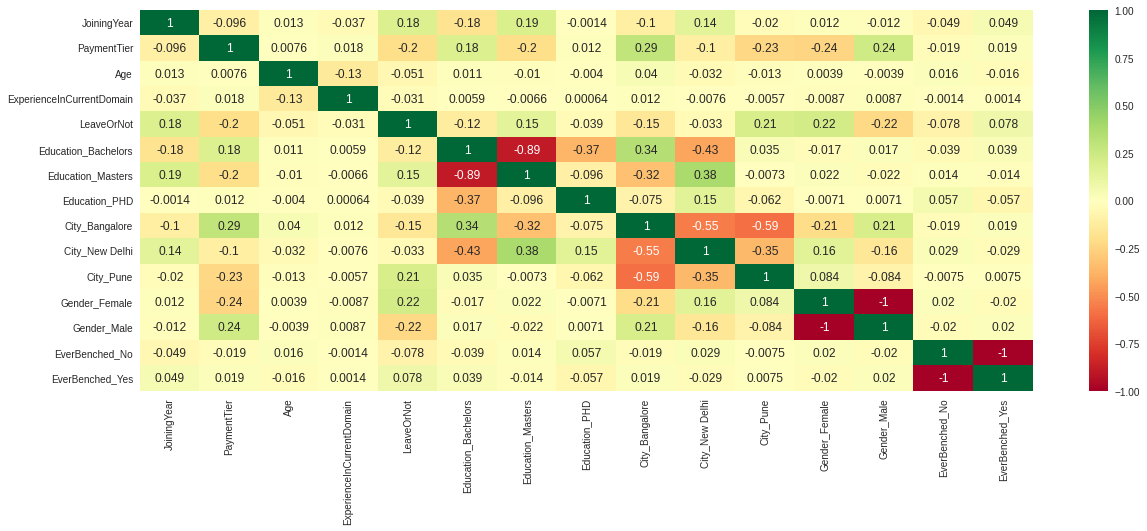

In [ ]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(employee_fut.corr(), annot=True, cmap='RdYlGn')

#Using OLS for finding the p value to check the significant features

In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(employee_fut['LeaveOrNot'], employee_fut[['JoiningYear', 'PaymentTier', 'Age' , 'ExperienceInCurrentDomain' ,'Education_Bachelors','Education_Masters','Education_PHD','City_Bangalore','City_New Delhi','City_Pune','Gender_Female','Gender_Male','EverBenched_No','EverBenched_Yes' ]]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LeaveOrNot   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     82.40
Date:                Fri, 16 Dec 2022   Prob (F-statistic):          1.25e-156
Time:                        04:00:51   Log-Likelihood:                -2758.3
No. Observations:                4653   AIC:                             5539.
Df Residuals:                    4642   BIC:                             5609.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
JoiningYear                   0.0403      0.004     11.398      0.000       0.033       0.047
PaymentTier                  -0.0743      0.012     -5.988      0.000      -0.099      -0.050
Age                          -0.0055      0.001     -4.092      0.000      -0.008      -0.003
ExperienceInCurrentDomain    -0.0086      0.004     -2.057      0.040      -0.017      -0.000
Education_Bachelors         -16.1458      1.426    -11.325      0.000     -18.941     -13.351
Education_Masters           -15.9838      1.428    -11.191      0.000     -18.784     -13.184
Education_PHD               -16.1358      1.426    -11.315      0.000     -18.932     -13.340
City_Bangalore              -16.1011      1.426    -11.289      0.000     -18.897     -13.305
City_New Delhi              -16.2099      1.427    -11.356      0.000     -19.008     -13.411
City_Pune                   -15.9545      1.426    -11.187      0.000     -18.750     -13.159
Gender_Female               -24.0356      2.140    -11.233      0.000     -28.230     -19.841
Gender_Male                 -24.2299      2.140    -11.323      0.000     -28.425     -20.035
EverBenched_No              -24.1903      2.139    -11.308      0.000     -28.384     -19.996
EverBenched_Yes             -24.0752      2.140    -11.248      0.000     -28.272     -19.879
==============================================================================
Omnibus:                     1166.608   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              407.835
Skew:                           0.532   Prob(JB):                     2.75e-89
Kurtosis:                       2.015   Cond. No.                     2.81e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.39e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
emp=employee_fut.copy()

In [ ]:
from sklearn.model_selection import  train_test_split

X = employee_fut[ ['JoiningYear', 'PaymentTier', 'Age' , 'ExperienceInCurrentDomain' ,'Education_Bachelors','Education_Masters','Education_PHD','City_Bangalore','City_New Delhi','City_Pune','Gender_Female','Gender_Male','EverBenched_No','EverBenched_Yes']]

y = employee_fut['LeaveOrNot']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Looking the data for test, training and validation set

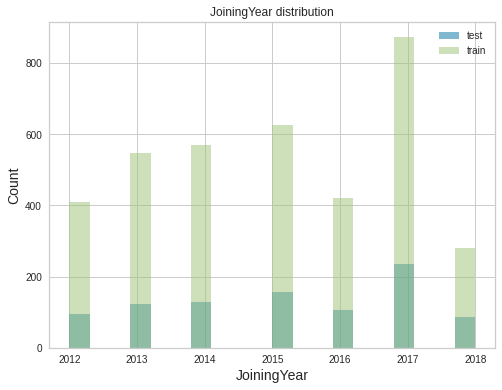

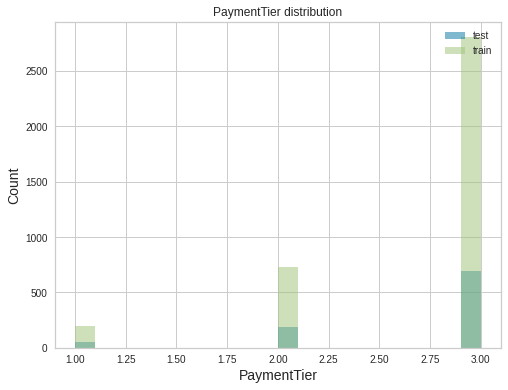

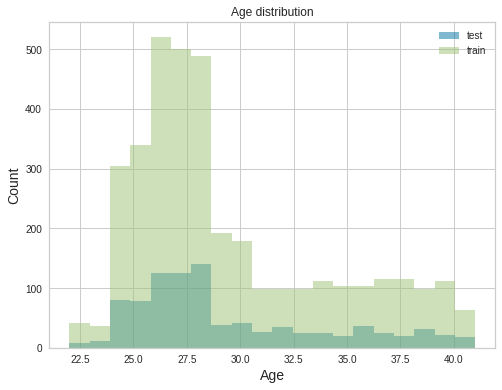

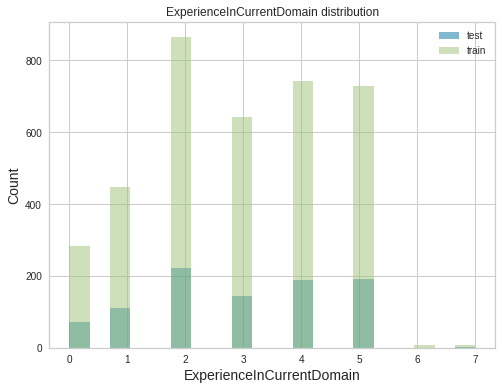

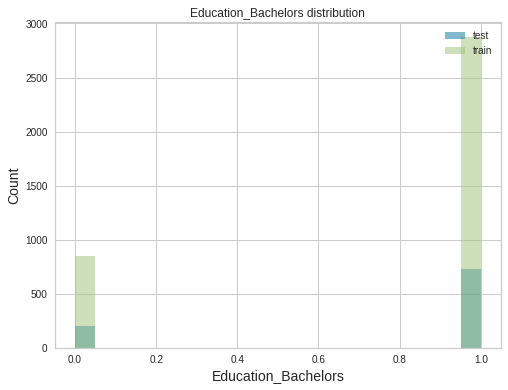

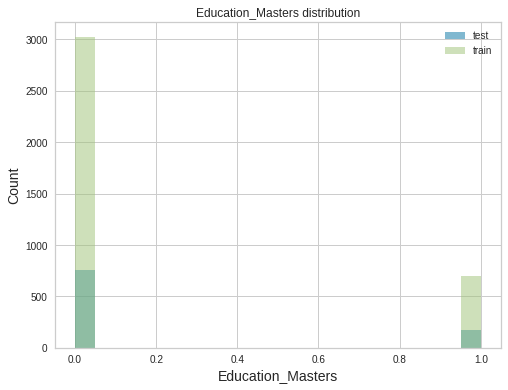

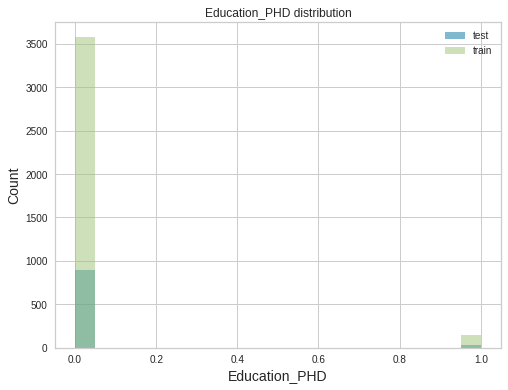

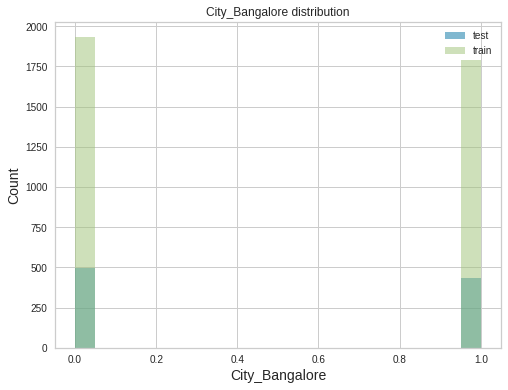

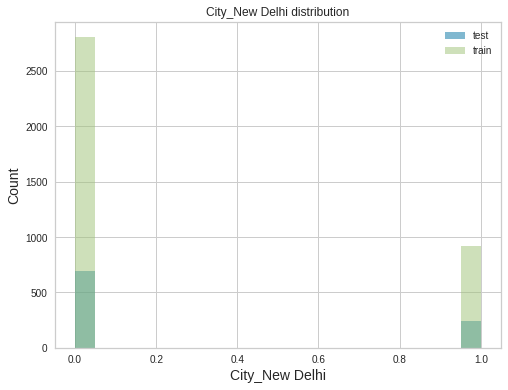

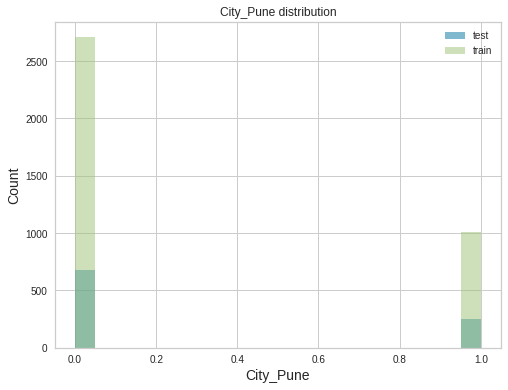

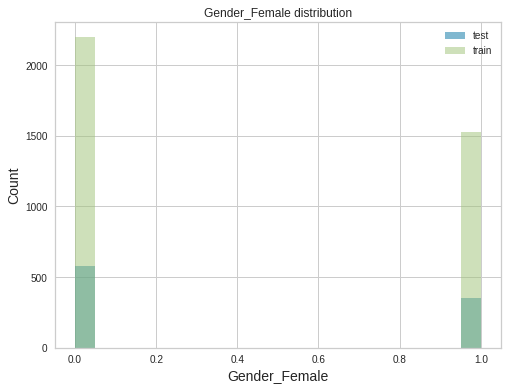

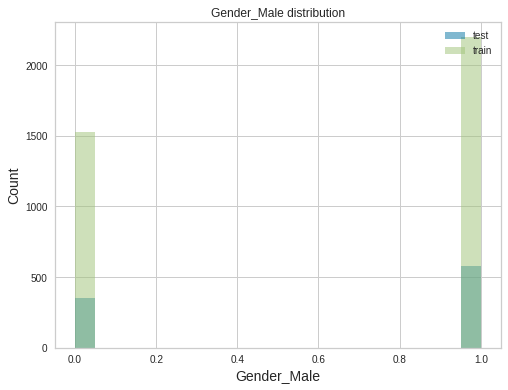

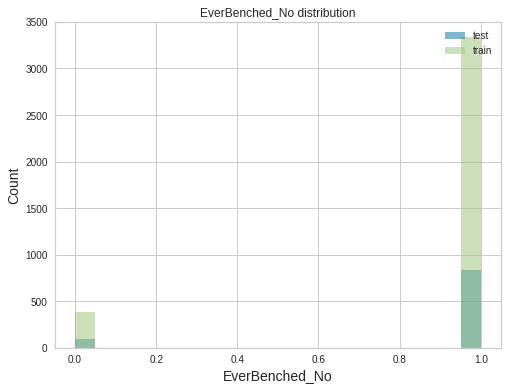

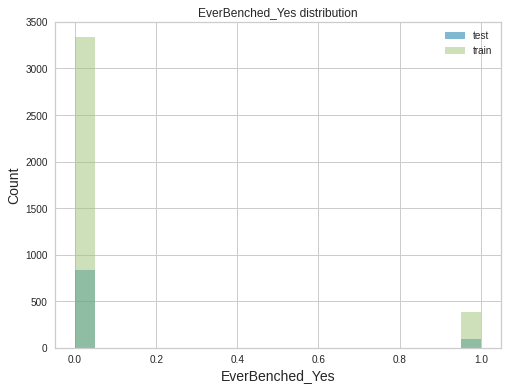

In [ ]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['JoiningYear', 'PaymentTier', 'Age' , 'ExperienceInCurrentDomain' ,'Education_Bachelors','Education_Masters','Education_PHD','City_Bangalore','City_New Delhi','City_Pune','Gender_Female','Gender_Male','EverBenched_No','EverBenched_Yes']]


X_train_plot = X_train[['JoiningYear', 'PaymentTier', 'Age' , 'ExperienceInCurrentDomain' ,'Education_Bachelors','Education_Masters','Education_PHD','City_Bangalore','City_New Delhi','City_Pune','Gender_Female','Gender_Male','EverBenched_No','EverBenched_Yes']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 

# Running logistic regression model

In [ ]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

# Print the prediction accuracy
from sklearn import metrics
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7110633727175081


In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


#Understanding the important features 

In [ ]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0501 ± 0.0126,City_Pune
0.0286 ± 0.0059,Gender_Male
0.0264 ± 0.0091,Gender_Female
0.0187 ± 0.0130,City_New Delhi
0.0155 ± 0.0104,PaymentTier
0.0067 ± 0.0048,Education_Masters
0.0039 ± 0.0075,Age
0.0037 ± 0.0026,EverBenched_Yes
0.0032 ± 0.0043,EverBenched_No
0.0017 ± 0.0044,ExperienceInCurrentDomain


# Removing Outliers:

In [ ]:
scaler= StandardScaler()
X = scaler.fit_transform(X)

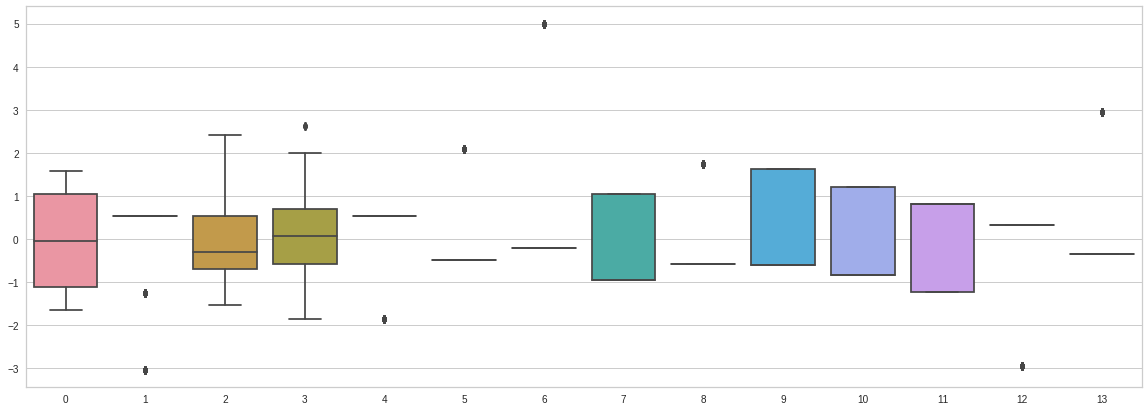

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=X)

In [ ]:
Q1JY,Q3JY = np.percentile(employee_fut['JoiningYear'] , [25,75])
IQR1 = Q3JY - Q1JY

UJY = Q3JY + 1.5*IQR1

LJY = Q1JY - 1.5*IQR1

print(UJY)
print(LJY)

employee_fut_new.drop(employee_fut_new[employee_fut_new['JoiningYear'] < LJY].index, inplace=True)
employee_fut_new.drop(employee_fut_new[employee_fut_new['JoiningYear'] > UJY].index, inplace=True)

2023.0
2007.0


In [ ]:
Q1PT,Q3PT = np.percentile(employee_fut['PaymentTier'] , [25,75])
IQR2 = Q3PT - Q1PT

UPT=Q3PT + 1.5*IQR2

LPT = Q1PT - 1.5*IQR2

print(UPT)
print(LPT)

employee_fut_new.drop(employee_fut_new[employee_fut_new['PaymentTier'] < LPT].index, inplace=True)
employee_fut_new.drop(employee_fut_new[employee_fut_new['PaymentTier'] > UPT].index, inplace=True)

3.0
3.0


In [ ]:
Q1A,Q3A = np.percentile(employee_fut['Age'] , [25,75])
IQR3 = Q3A - Q1A

UA = Q3A + 1.5*IQR3

LA = Q1A - 1.5*IQR3

print(UA)
print(LA)

employee_fut_new.drop(employee_fut_new[employee_fut_new['Age'] < LA].index, inplace=True)
employee_fut_new.drop(employee_fut_new[employee_fut_new['Age'] > UA].index, inplace=True)

41.0
17.0


In [ ]:
Q1Exp,Q3Exp = np.percentile(employee_fut['ExperienceInCurrentDomain'] , [25,75])
IQR4 = Q3Exp - Q1Exp

UExp = Q3Exp + 1.5*IQR4

LExp = Q1Exp - 1.5*IQR4

print(UExp)
print(LExp)

employee_fut_new.drop(employee_fut_new[employee_fut_new['ExperienceInCurrentDomain'] < LExp].index, inplace=True)
employee_fut_new.drop(employee_fut_new[employee_fut_new['ExperienceInCurrentDomain'] > UExp].index, inplace=True)

7.0
-1.0


In [ ]:
Q1LN,Q3LN = np.percentile(employee_fut['LeaveOrNot'] , [25,75])
IQR5 = Q3LN - Q1LN

ULN = Q3LN + 1.5*IQR5

LLN = Q1LN - 1.5*IQR5

print(ULN)
print(LLN)

employee_fut_new.drop(employee_fut_new[employee_fut_new['LeaveOrNot'] < LLN].index, inplace=True)
employee_fut_new.drop(employee_fut_new[employee_fut_new['LeaveOrNot'] > ULN].index, inplace=True)

2.5
-1.5


In [ ]:
Q1ED,Q3ED = np.percentile(employee_fut['Education_Bachelors'] , [25,75])
IQR6 = Q3ED - Q1ED

UED = Q3ED + 1.5*IQR6

LED = Q1ED - 1.5*IQR6

print(UED)
print(LED)

employee_fut_new.drop(employee_fut_new[employee_fut_new['Education_Bachelors'] < LED].index, inplace=True)
employee_fut_new.drop(employee_fut_new[employee_fut_new['Education_Bachelors'] > UED].index, inplace=True)

1.0
1.0


In [ ]:
Q1EM,Q3EM = np.percentile(employee_fut['Education_Masters'] , [25,75])
IQR7 = Q3EM - Q1EM

UEM = Q3EM + 1.5*IQR7

LEM = Q1EM - 1.5*IQR7

print(UEM)
print(LEM)

employee_fut_new.drop(employee_fut_new[employee_fut_new['Education_Masters'] < LEM].index, inplace=True)
employee_fut_new.drop(employee_fut_new[employee_fut_new['Education_Masters'] > UEM].index, inplace=True)

0.0
0.0


In [ ]:
Q1EP,Q3EP = np.percentile(employee_fut['Education_PHD'] , [25,75])
IQR8 = Q3EP - Q1EP

UEP = Q3EP + 1.5*IQR8

LEP = Q1EP - 1.5*IQR8

print(UEP)
print(LEP)

employee_fut_new.drop(employee_fut_new[employee_fut_new['Education_PHD'] < LEP].index, inplace=True)
employee_fut_new.drop(employee_fut_new[employee_fut_new['Education_PHD'] > UEP].index, inplace=True)

0.0
0.0


In [ ]:
Q1CB,Q3CB = np.percentile(employee_fut['City_Bangalore'] , [25,75])
IQR9 = Q3CB - Q1CB

UCB = Q3CB + 1.5*IQR9

LCB = Q1CB - 1.5*IQR9

print(UCB)
print(LCB)

employee_fut_new.drop(employee_fut_new[employee_fut_new['City_Bangalore'] < LCB].index, inplace=True)
employee_fut_new.drop(employee_fut_new[employee_fut_new['City_Bangalore'] > UCB].index, inplace=True)

2.5
-1.5


In [ ]:
Q1CND,Q3CND = np.percentile(employee_fut['City_New Delhi'] , [25,75])
IQR10 = Q3CND - Q1CND

UCND = Q3CND + 1.5*IQR10

LCND = Q1CND - 1.5*IQR10

print(UCND)
print(LCND)

employee_fut_new.drop(employee_fut_new[employee_fut_new['City_New Delhi'] < LCND].index, inplace=True)
employee_fut_new.drop(employee_fut_new[employee_fut_new['City_New Delhi'] > UCND].index, inplace=True)

0.0
0.0


In [ ]:
Q1CP,Q3CP = np.percentile(employee_fut['City_Pune'] , [25,75])
IQR11 = Q3CP - Q1CP

UCP = Q3CP + 1.5*IQR11

LCP = Q1CP - 1.5*IQR11

print(UCP)
print(LCP)

employee_fut_new.drop(employee_fut_new[employee_fut_new['City_Pune'] < LCP].index, inplace=True)
employee_fut_new.drop(employee_fut_new[employee_fut_new['City_Pune'] > UCP].index, inplace=True)

2.5
-1.5


In [ ]:
Q1GF,Q3GF = np.percentile(employee_fut['Gender_Female'] , [25,75])
IQR12 = Q3GF - Q1GF

UGF = Q3GF + 1.5*IQR12

LGF = Q1GF - 1.5*IQR12

print(UGF)
print(LGF)

employee_fut_new.drop(employee_fut_new[employee_fut_new['Gender_Female'] < LGF].index, inplace=True)
employee_fut_new.drop(employee_fut_new[employee_fut_new['Gender_Female'] > UGF].index, inplace=True)

2.5
-1.5


In [ ]:
Q1GM,Q3GM = np.percentile(employee_fut['Gender_Male'] , [25,75])
IQR13 = Q3GM - Q1GM

UGM = Q3GM + 1.5*IQR13

LGM = Q1GM - 1.5*IQR13

print(UGM)
print(LGM)

employee_fut_new.drop(employee_fut_new[employee_fut_new['Gender_Male'] < LGM].index, inplace=True)
employee_fut_new.drop(employee_fut_new[employee_fut_new['Gender_Male'] > UGM].index, inplace=True)

2.5
-1.5


In [ ]:
Q1EBN,Q3EBN = np.percentile(employee_fut['EverBenched_No'] , [25,75])
IQR14 = Q3EBN - Q1EBN

UEBN = Q3EBN + 1.5*IQR14

LEBN = Q1EBN - 1.5*IQR14

print(UEBN)
print(LEBN)

employee_fut_new.drop(employee_fut_new[employee_fut_new['EverBenched_No'] < LEBN].index, inplace=True)
employee_fut_new.drop(employee_fut_new[employee_fut_new['EverBenched_No'] > UEBN].index, inplace=True)

1.0
1.0


In [ ]:
Q1EBY,Q3EBY = np.percentile(employee_fut['EverBenched_Yes'] , [25,75])
IQR15 = Q3EBY - Q1EBY

UEBY = Q3EBY + 1.5*IQR15

LEBY = Q1EBY - 1.5*IQR15

print(UEBY)
print(LEBY)

employee_fut_new.drop(employee_fut_new[employee_fut_new['EverBenched_Yes'] < LEBY].index, inplace=True)
employee_fut_new.drop(employee_fut_new[employee_fut_new['EverBenched_Yes'] > UEBY].index, inplace=True)

0.0
0.0


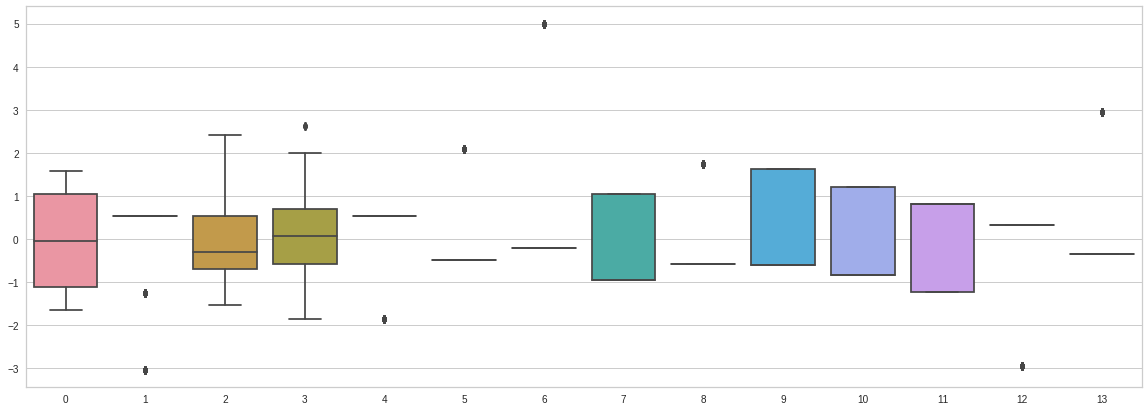

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=X)

# Running logistic regression model

In [ ]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

# Print the prediction accuracy
from sklearn import metrics
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7110633727175081


In [ ]:
employee_fut_new.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
count,2226.000000,2226.0,2226.000000,2226.000000,2226.000000,2226.0,2226.0,2226.0,2226.000000,2226.0,2226.000000,2226.000000,2226.000000,2226.0,2226.0
mean,2014.755615,3.0,29.520665,2.917341,0.236298,1.0,0.0,0.0,0.764151,0.0,0.235849,0.277628,0.722372,1.0,0.0
std,1.847081,0.0,4.912518,1.582885,0.424903,0.0,0.0,0.0,0.424624,0.0,0.424624,0.447930,0.447930,0.0,0.0
min,2012.000000,3.0,22.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0
25%,2013.000000,3.0,26.000000,2.000000,0.000000,1.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0
50%,2015.000000,3.0,28.000000,3.000000,0.000000,1.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,1.000000,1.0,0.0
75%,2016.000000,3.0,33.000000,4.000000,0.000000,1.0,0.0,0.0,1.000000,0.0,0.000000,1.000000,1.000000,1.0,0.0
max,2018.000000,3.0,41.000000,7.000000,1.000000,1.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.0,0.0


# IMPUTATION

In [ ]:
df_null_1=employee_fut[['Age','JoiningYear','ExperienceInCurrentDomain']].copy()
df_null_5=employee_fut[['Age','JoiningYear','ExperienceInCurrentDomain']].copy()
df_null_10=employee_fut[['Age','JoiningYear','ExperienceInCurrentDomain']].copy()

# Creating a list of 1% data and filling with NaN
empty_1=df_null_1['Age'].sample(frac=0.01, replace=True, random_state=1)
df_null_1.loc[empty_1.index, 'Age'] = np.NaN

# Creating a list of 5% data and filling with NaN
empty_5=df_null_5['Age'].sample(frac=0.05, replace=True, random_state=1)
df_null_5.loc[empty_5.index, 'Age'] = np.NaN

# Creating a list of 10% data and filling with NaN
empty_10=df_null_10['Age'].sample(frac=0.1, replace=True, random_state=1)
df_null_10.loc[empty_10.index, 'Age'] = np.NaN

#import SimpleImputer

In [ ]:
#import SimpleImputer
from sklearn.impute import SimpleImputer

#Fill with most frequent
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#For 1%
df_filled_1=pd.DataFrame(simple_imputer.fit_transform(df_null_1))
df_filled_1.columns=df_null_1.columns
df_filled_1.index=df_null_1.index
age_filled_1=df_filled_1.iloc[empty_1.index].Age

#For 5%
df_filled_5=pd.DataFrame(simple_imputer.fit_transform(df_null_5))
df_filled_5.columns=df_null_5.columns
df_filled_5.index=df_null_5.index
age_filled_5=df_filled_5.iloc[empty_5.index].Age

#For 10%
df_filled_10=pd.DataFrame(simple_imputer.fit_transform(df_null_10))
df_filled_10.columns=df_null_10.columns
df_filled_10.index=df_null_10.index
age_filled_10=df_filled_10.iloc[empty_10.index].Age

In [ ]:
# Calculation percentage of residual errors
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [ ]:
# Percentage of Residual errors at 1%, 5% and 10% data for monthly Charges
MAPE(empty_1, age_filled_1), MAPE(empty_5, age_filled_5), MAPE(empty_10, age_filled_10)

(12.340294281189983, 12.960688373225313, 13.056391761915862)

In [ ]:
#Fill with most frequent
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

#For 1%
df_filled_1=pd.DataFrame(simple_imputer.fit_transform(df_null_1))
df_filled_1.columns=df_null_1.columns
df_filled_1.index=df_null_1.index
age_filled_1=df_filled_1.iloc[empty_1.index].Age

#For 5%
df_filled_5=pd.DataFrame(simple_imputer.fit_transform(df_null_5))
df_filled_5.columns=df_null_5.columns
df_filled_5.index=df_null_5.index
age_filled_5=df_filled_5.iloc[empty_5.index].Age

#For 10%
df_filled_10=pd.DataFrame(simple_imputer.fit_transform(df_null_10))
df_filled_10.columns=df_null_10.columns
df_filled_10.index=df_null_10.index
age_filled_10=df_filled_10.iloc[empty_10.index].Age

In [ ]:
# Percentage of Residual errors at 1%, 5% and 10% data for monthly Charges
MAPE(empty_1, age_filled_1), MAPE(empty_5, age_filled_5), MAPE(empty_10, age_filled_10)

(10.964193212619431, 12.074154383489278, 12.005869798798354)

#Import KNN Imputer

In [ ]:
#import KNNImputer
from sklearn.impute import KNNImputer

#Fill with most frequent
KNN_imputer = KNNImputer(missing_values=np.nan)

#For 1%
df_filled_1=pd.DataFrame(KNN_imputer.fit_transform(df_null_1))
df_filled_1.columns=df_null_1.columns
df_filled_1.index=df_null_1.index
age_filled_1=df_filled_1.iloc[empty_1.index].Age

#For 5%
df_filled_5=pd.DataFrame(KNN_imputer.fit_transform(df_null_5))
df_filled_5.columns=df_null_5.columns
df_filled_5.index=df_null_5.index
age_filled_5=df_filled_5.iloc[empty_5.index].Age

#For 10%
df_filled_10=pd.DataFrame(KNN_imputer.fit_transform(df_null_10))
df_filled_10.columns=df_null_10.columns
df_filled_10.index=df_null_10.index
age_filled_10=df_filled_10.iloc[empty_10.index].Age

In [ ]:
# Percentage of Residual errors at 1%, 5% and 10% data for monthly Charges
MAPE(empty_1, age_filled_1), MAPE(empty_5, age_filled_5), MAPE(empty_10, age_filled_10)

(12.597067558045186, 11.932821816217801, 12.949979306752656)

# Binary Classification

In [ ]:
#importing classification
from pycaret.classification import *

In [ ]:
employee_fut

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,2017,3,34,0,0,1,0,0,1,0,0,0,1,1,0
1,2013,1,28,3,1,1,0,0,0,0,1,1,0,1,0
2,2014,3,38,2,0,1,0,0,0,1,0,1,0,1,0
3,2016,3,27,5,1,0,1,0,1,0,0,0,1,1,0
4,2017,3,24,2,1,0,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,4,0,1,0,0,1,0,0,1,0,1,0
4649,2013,2,37,2,1,0,1,0,0,0,1,0,1,1,0
4650,2018,3,27,5,1,0,1,0,0,1,0,0,1,1,0
4651,2012,3,30,2,0,1,0,0,1,0,0,0,1,0,1


In [ ]:
leave_mapping = { 1 : 'Leave', 0 : 'Not'}
employee_fut['LeaveOrNot'] =  employee_fut['LeaveOrNot'].map(leave_mapping)

# Setting up the Classifier

In [ ]:
clf1 = setup(data = employee_fut, 
             target = 'LeaveOrNot',
             normalize=True,
             normalize_method='minmax',
             remove_multicollinearity=True,
             fold=5,
             fix_imbalance=True,
             silent = True)

,Description,Value
0,session_id,5831
1,Target,LeaveOrNot
2,Target Type,Binary
3,Label Encoded,"Leave: 0, Not: 1"
4,Original Data,"(4653, 15)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='LeaveOrNot', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_...
                ('dummy', Dummify(target='LeaveOrNot')),
                ('fix_perfect', Remove_100(target='LeaveOrNot')),
                ('clean_names', Clean_Colum_Names()

# Model Comparison & Evaluation

In [ ]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8299,0.8500,0.9130,0.8413,0.8757,0.6079,0.6132,0.316
gbc,Gradient Boosting Classifier,0.8290,0.8507,0.9083,0.8434,0.8745,0.6071,0.6116,0.464
rf,Random Forest Classifier,0.8176,0.8363,0.9022,0.8336,0.8665,0.5801,0.5848,0.510
et,Extra Trees Classifier,0.8047,0.8181,0.8746,0.8355,0.8546,0.5580,0.5594,0.528
ridge,Ridge Classifier,0.7909,0.0000,0.8582,0.8292,0.8434,0.5290,0.5299,0.086
lda,Linear Discriminant Analysis,0.7903,0.8111,0.8577,0.8288,0.8430,0.5277,0.5285,0.112
ada,Ada Boost Classifier,0.7897,0.8058,0.8732,0.8185,0.8449,0.5193,0.5221,0.270
lr,Logistic Regression,0.7848,0.8142,0.8432,0.8312,0.8372,0.5199,0.5201,0.698
dt,Decision Tree Classifier,0.7759,0.7739,0.8269,0.8307,0.8288,0.5044,0.5045,0.096
svm,SVM - Linear Kernel,0.7532,0.0000,0.7867,0.8302,0.8013,0.4721,0.4841,0.112


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5831, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


# Creating a model
We will use Light GBM model here, as it is performs well and is computationally inexpensive and quick.

In [ ]:
lgbm=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8221,0.8406,0.9182,0.8291,0.8714,0.5853,0.5933
1,0.8497,0.8603,0.9252,0.8571,0.8899,0.6543,0.6590
2,0.8433,0.8551,0.9251,0.8495,0.8857,0.6383,0.6442
3,0.8065,0.8416,0.8876,0.8293,0.8575,0.5571,0.5602
4,0.8280,0.8524,0.9087,0.8416,0.8739,0.6046,0.6090
Mean,0.8299,0.8500,0.9130,0.8413,0.8757,0.6079,0.6132
Std,0.0154,0.0077,0.0140,0.0110,0.0114,0.0351,0.0354


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5831, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


# Hyperparameter Tuning

In [ ]:
tuned_model = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8113,0.8431,0.9229,0.8144,0.8653,0.5548,0.5670
1,0.8574,0.8622,0.9322,0.8618,0.8956,0.6715,0.6767
2,0.8418,0.8704,0.9204,0.8506,0.8841,0.6360,0.6409
3,0.8157,0.8496,0.8970,0.8344,0.8646,0.5773,0.5810
4,0.8402,0.8677,0.9251,0.8458,0.8837,0.6304,0.6369
Mean,0.8333,0.8586,0.9195,0.8414,0.8787,0.6140,0.6205
Std,0.0173,0.0106,0.0119,0.0161,0.0120,0.0422,0.0407


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(bagging_fraction=0.7, bagging_freq=0, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=11, min_child_weight=0.001, min_split_gain=0.5,
               n_estimators=270, n_jobs=-1, num_leaves=20, objective=None,
               random_state=5831, reg_alpha=0.1, reg_lambda=4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


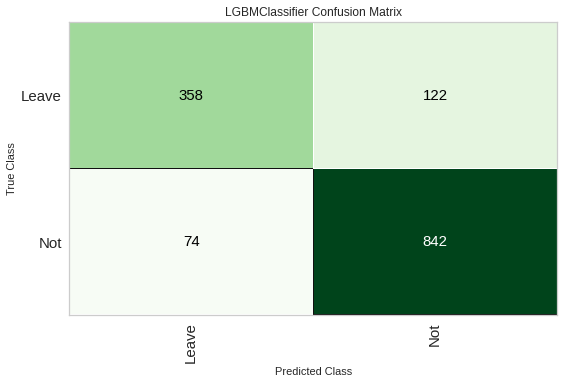

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#Plotting the confusion Matrix
plot_model(estimator = tuned_model, plot = 'confusion_matrix')

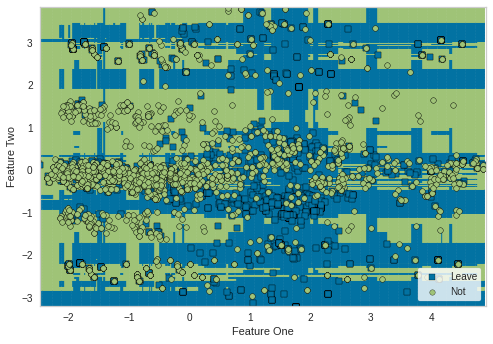

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#plotting decision boundary
plot_model(estimator = tuned_model, plot = 'boundary', use_train_data = True)

# Feature Importance

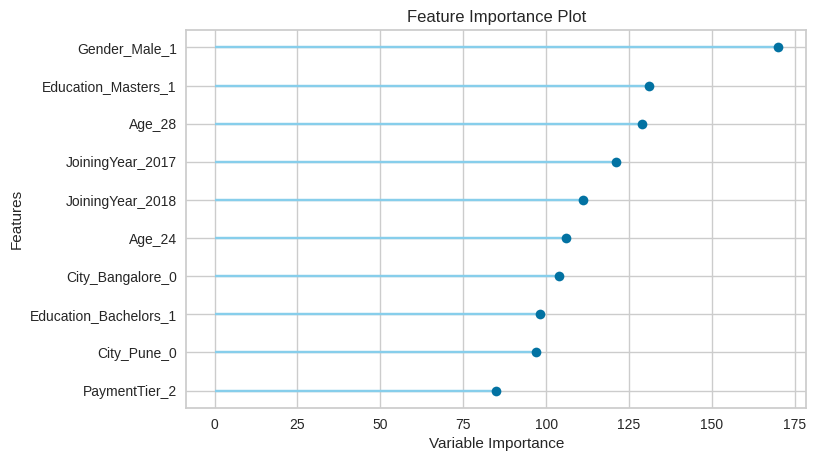

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#Plotting Feature Importance
plot_model(estimator = tuned_model, plot = 'feature')

In [ ]:
plot_model(tuned_model, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.05
max_depth,-1
min_child_samples,11
min_child_weight,0.001
min_split_gain,0.5
n_estimators,270


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# interpret_model(tuned_model)

# Multiclass Classification

In [ ]:
employee_fut.PaymentTier.unique()

array([3, 1, 2])

In [ ]:
print("Distribution of Contract Types:")
print(round(employee_fut['PaymentTier'].value_counts(normalize=True) * 100,2))

Distribution of Contract Types:
3    75.05
2    19.73
1     5.22
Name: PaymentTier, dtype: float64


In [ ]:
clf1 = setup(data = employee_fut, 
             target = 'PaymentTier',
             normalize=True,
             normalize_method='minmax',
             remove_multicollinearity=True,
             fold=5,
             fix_imbalance=True,
             silent = True)

,Description,Value
0,session_id,3385
1,Target,PaymentTier
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(4653, 15)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='PaymentTier', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric...
                ('dummy', Dummify(target='PaymentTier')),
                ('fix_perfect', Remove_100(target='PaymentTier')),
                ('clean_names', Clean_Colum_Names

In [ ]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8333,0.8564,0.5914,0.8280,0.8206,0.5889,0.5954,2.568
lightgbm,Light Gradient Boosting Machine,0.8204,0.8563,0.5694,0.8093,0.8105,0.5479,0.5516,0.704
rf,Random Forest Classifier,0.8167,0.8501,0.5522,0.7991,0.8056,0.5339,0.5367,0.698
et,Extra Trees Classifier,0.8053,0.8218,0.5587,0.7987,0.8004,0.5146,0.5166,0.728
dt,Decision Tree Classifier,0.7759,0.7656,0.5387,0.7867,0.7799,0.4622,0.4643,0.086
ada,Ada Boost Classifier,0.7077,0.8297,0.5446,0.7973,0.7419,0.4030,0.4219,0.342
ridge,Ridge Classifier,0.6435,0.0000,0.5483,0.8035,0.6916,0.3552,0.3963,0.066
svm,SVM - Linear Kernel,0.6374,0.0000,0.5417,0.7993,0.6781,0.3596,0.3968,0.182
knn,K Neighbors Classifier,0.6346,0.7665,0.5571,0.7925,0.6877,0.3317,0.3677,0.502
lda,Linear Discriminant Analysis,0.6254,0.8276,0.5476,0.8085,0.6838,0.3388,0.3834,0.104


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3385, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


# Create a Model

We will create a LightGBM model

In [ ]:
lgbm=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7975,0.8465,0.5603,0.7953,0.7920,0.5155,0.5210
1,0.8344,0.8580,0.5729,0.8164,0.8197,0.5680,0.5706
2,0.8218,0.8451,0.5561,0.8026,0.8107,0.5360,0.5375
3,0.8280,0.8611,0.5529,0.8040,0.8148,0.5511,0.5529
4,0.8203,0.8707,0.6050,0.8280,0.8154,0.5688,0.5760
Mean,0.8204,0.8563,0.5694,0.8093,0.8105,0.5479,0.5516
Std,0.0125,0.0095,0.0190,0.0116,0.0097,0.0202,0.0205


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3385, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_model = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8328,0.8611,0.5819,0.8052,0.8156,0.5836,0.5893
1,0.8313,0.8469,0.5681,0.8004,0.8137,0.5718,0.5760
2,0.8372,0.8414,0.5758,0.8127,0.8222,0.5925,0.5973
3,0.8479,0.8588,0.5865,0.8170,0.8299,0.6153,0.6203
4,0.8172,0.8768,0.5747,0.8052,0.8047,0.5619,0.5724
Mean,0.8333,0.8570,0.5774,0.8081,0.8172,0.5850,0.5911
Std,0.0099,0.0123,0.0063,0.0060,0.0084,0.0184,0.0172


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(bagging_fraction=0.6, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=56, min_child_weight=0.001, min_split_gain=0.8,
               n_estimators=130, n_jobs=-1, num_leaves=50, objective=None,
               random_state=3385, reg_alpha=1, reg_lambda=1e-06, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


#Plotting the confusion Matrix

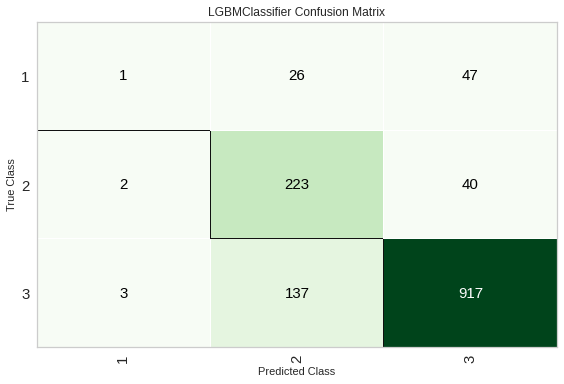

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#Plotting the confusion Matrix
plot_model(estimator = tuned_model, plot = 'confusion_matrix')

#Plotting decision boundary

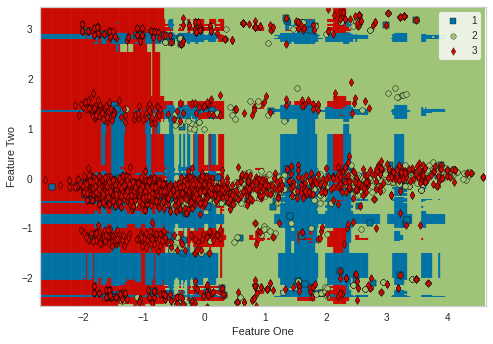

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#plotting decision boundary
plot_model(estimator = tuned_model, plot = 'boundary', use_train_data = True)

#Plotting Feature Importance

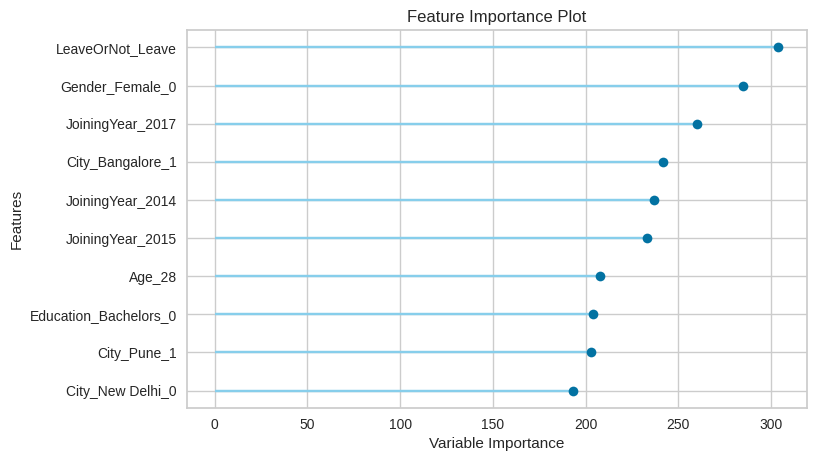

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
#Plotting Feature Importance
plot_model(estimator = tuned_model, plot = 'feature')

# Regression

In [ ]:
from pycaret.regression import *

In [ ]:
reg = setup(data = employee_fut, 
            target = 'Age',
            train_size=0.8,
            normalize=True,
            normalize_method='minmax',
            remove_multicollinearity=True,
            fold=5,
            transform_target=True,
            silent = True)

,Description,Value
0,session_id,4415
1,Target,Age
2,Original Data,"(4653, 15)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,14
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3722, 26)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Age',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='m...
                ('dummy', Dummify(target='Age')),
                ('fix_perfect', Remove_100(target='Age')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough')

In [ ]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,3.5375,23.0834,4.8007,0.0073,0.1481,0.1123,0.196
lar,Least Angle Regression,3.5477,23.1681,4.8095,0.0037,0.1484,0.1126,0.030
ridge,Ridge Regression,3.5503,23.1895,4.8120,0.0026,0.1485,0.1127,0.024
lr,Linear Regression,3.5497,23.2431,4.8173,0.0004,0.1487,0.1127,0.032
br,Bayesian Ridge,3.5709,23.3785,4.8326,-0.0061,0.1490,0.1133,0.030
omp,Orthogonal Matching Pursuit,3.5402,23.5735,4.8532,-0.0149,0.1498,0.1124,0.026
huber,Huber Regressor,3.4121,23.8352,4.8780,-0.0249,0.1510,0.1072,0.632
lightgbm,Light Gradient Boosting Machine,3.6149,23.8969,4.8851,-0.0280,0.1512,0.1150,0.212
ada,AdaBoost Regressor,3.7505,24.2513,4.9223,-0.0439,0.1521,0.1198,0.062
lasso,Lasso Regression,3.6822,24.5176,4.9496,-0.0556,0.1529,0.1171,0.028


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 2
INFO:logs:PowerTransformedTargetRegressor(alpha=0.9, ccp_alpha=0.0,
                                criterion='friedman_mse', init=None,
                                learning_rate=0.1, loss='ls', max_depth=3,
                                max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_iter_no_change=None,
                                power_transformer_method...
                                                                    max_leaf_nodes=None,
                                                                    min_impurity_decrease=0.0,
                                           

In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.6986,24.9071,4.9907,-0.0445,0.1545,0.1176
1,3.3676,21.2383,4.6085,0.0050,0.1427,0.1072
2,3.6153,23.0733,4.8035,-0.0034,0.1494,0.1165
3,3.8178,26.5182,5.1496,-0.0718,0.1585,0.1198
4,3.5753,23.7474,4.8731,-0.0252,0.1509,0.1141
Mean,3.6149,23.8969,4.8851,-0.0280,0.1512,0.1150
Std,0.1490,1.7698,0.1813,0.0279,0.0053,0.0043


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 3
INFO:logs:PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=4...
                                                        importance_type='split',
                                                        learning_rate=0.1,
                                                        max_depth=-1,
                                  

In [ ]:
tuned_model = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.6378,24.3076,4.9303,-0.0194,0.1520,0.1152
1,3.3666,20.8997,4.5716,0.0209,0.1412,0.1071
2,3.5407,22.7802,4.7729,0.0094,0.1480,0.1135
3,3.7441,25.5264,5.0524,-0.0317,0.1549,0.1172
4,3.5379,23.3589,4.8331,-0.0085,0.1493,0.1127
Mean,3.5655,23.3746,4.8320,-0.0058,0.1490,0.1131
Std,0.1250,1.5479,0.1609,0.0190,0.0046,0.0034


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 4
INFO:logs:PowerTransformedTargetRegressor(bagging_fraction=0.5, bagging_freq=1,
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.9,
                                importance_type='split', learning_rate=0.05,
                                max_depth=-1, min_child_samples=36,
                                min_child_weight=0.001, min_split_gain=0.1,
                                n_estimators=150, n_jobs=-1, num_leaves=6,
                                objective=None,
                                power_transformer_method='b...
                                                        importance_type='split',
                                                        learning_rate=0.05,
                                                        max_depth=-1,
                                

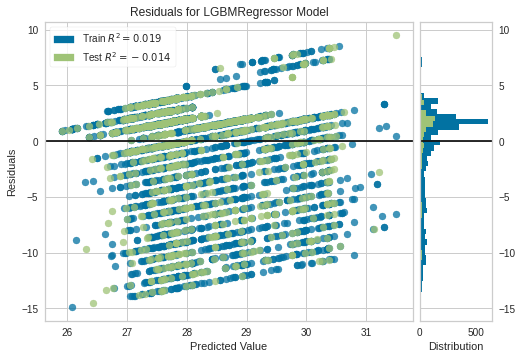

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(estimator = tuned_model, plot = 'residuals')

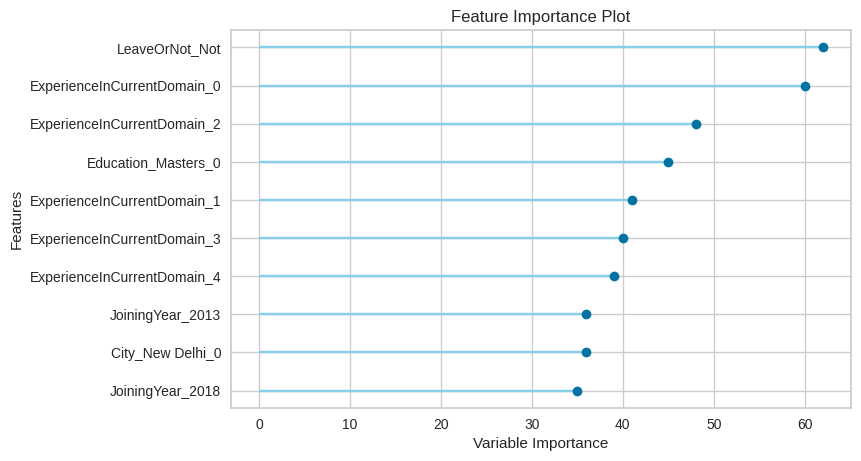

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(estimator = tuned_model, plot = 'feature')

# Building the Model Train and Test split:

In [ ]:
from sklearn.model_selection import  train_test_split

X = emp[ ['JoiningYear', 'PaymentTier', 'Age' , 'ExperienceInCurrentDomain' ,'Education_Bachelors','Education_Masters','Education_PHD','City_Bangalore','City_New Delhi','City_Pune','Gender_Female','Gender_Male','EverBenched_No','EverBenched_Yes']]

y = emp['LeaveOrNot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Logistic Regression:

In [ ]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

# Print the prediction accuracy
from sklearn import metrics
prediction_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7110633727175081


# Intercept

In [ ]:
print(model.intercept_)

[-0.00371872]


# Coefficients

In [ ]:
coef=pd.DataFrame(zip(X_train.columns, np.transpose(model.coef_[0])), columns=['features', 'coef']).sort_values(by=['coef'])

In [ ]:
coef.head(50)

,features,coef
8,City_New Delhi,-0.589011
11,Gender_Male,-0.472866
4,Education_Bachelors,-0.404588
1,PaymentTier,-0.387012
12,EverBenched_No,-0.330704
6,Education_PHD,-0.168444
3,ExperienceInCurrentDomain,-0.057065
2,Age,-0.029811
7,City_Bangalore,-0.027214
0,JoiningYear,0.000937


City_New Delhi is important feature Negatively and City_Pune is important feature positively.

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict for test dataset
y_pred = dt.predict(X_test)

# Print the prediction accuracy
print (metrics.accuracy_score(y_test, y_pred))

0.8259935553168636


# Interpreting the Nodes of Decision Tree

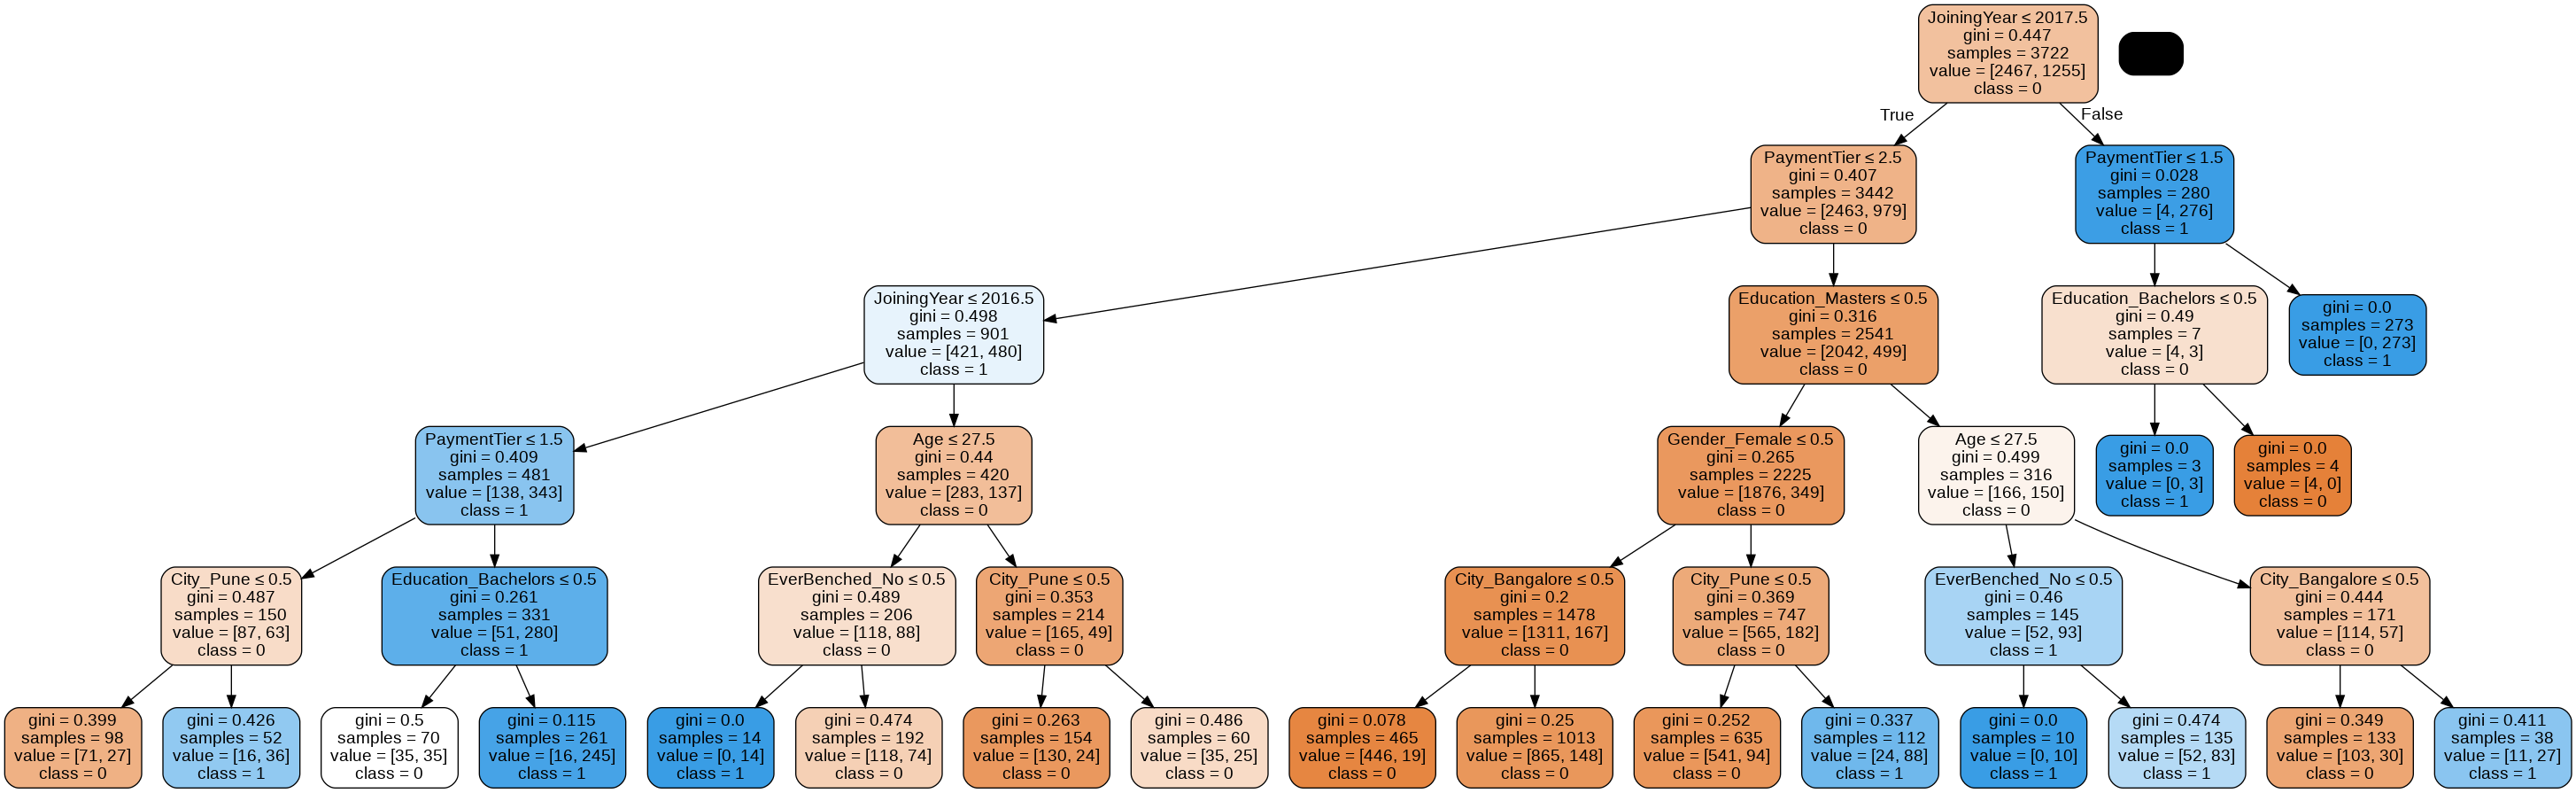

In [ ]:
from six import StringIO
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

Here the split start with Joining Year and if value is less than or greater than 2017.5 than they split into PaymentTier.

# AutoML - PyCaret Library

In [ ]:
# importing classification
from pycaret.classification import *

# Setting up the classifier

In [ ]:
clf1 = setup(data = employee_fut, 
             target = 'LeaveOrNot',
             normalize=True,
             normalize_method='minmax',
             remove_multicollinearity=True,
             fold=5,
             fix_imbalance=True,
             silent = True)

,Description,Value
0,session_id,7622
1,Target,LeaveOrNot
2,Target Type,Binary
3,Label Encoded,"Leave: 0, Not: 1"
4,Original Data,"(4653, 15)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='LeaveOrNot', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_...
                ('dummy', Dummify(target='LeaveOrNot')),
                ('fix_perfect', Remove_100(target='LeaveOrNot')),
                ('clean_names', Clean_Colum_Names()

# Model Comparison & Evaluation

In [ ]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8486,0.8682,0.9294,0.8532,0.8896,0.6501,0.6564,0.188
gbc,Gradient Boosting Classifier,0.8302,0.8661,0.9093,0.8442,0.8754,0.6101,0.6149,0.468
rf,Random Forest Classifier,0.8274,0.8506,0.9013,0.8461,0.8727,0.6056,0.6089,0.538
et,Extra Trees Classifier,0.8136,0.8277,0.8770,0.8451,0.8606,0.5796,0.5810,0.552
ridge,Ridge Classifier,0.7943,0.0000,0.8517,0.8377,0.8446,0.5404,0.5408,0.092
lda,Linear Discriminant Analysis,0.7943,0.8204,0.8517,0.8377,0.8446,0.5404,0.5408,0.120
lr,Logistic Regression,0.7897,0.8227,0.8358,0.8427,0.8391,0.5354,0.5358,0.156
ada,Ada Boost Classifier,0.7885,0.8099,0.8686,0.8199,0.8435,0.5180,0.5203,0.270
dt,Decision Tree Classifier,0.7860,0.7878,0.8307,0.8415,0.8358,0.5284,0.5291,0.102
svm,SVM - Linear Kernel,0.7694,0.0000,0.7984,0.8434,0.8176,0.5030,0.5091,0.116


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7622, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


Lgbm out performers the other models.

# Hyperparameter Tuning

In [ ]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8359,0.8643,0.8949,0.8607,0.8774,0.6295,0.6306
1,0.8466,0.8669,0.9019,0.8694,0.8853,0.6541,0.6551
2,0.8479,0.8837,0.9299,0.8522,0.8894,0.6476,0.6539
3,0.8664,0.8866,0.9438,0.8648,0.9026,0.6911,0.6979
4,0.8280,0.8492,0.9110,0.8402,0.8742,0.6037,0.6087
Mean,0.8450,0.8701,0.9163,0.8575,0.8858,0.6452,0.6492
Std,0.0130,0.0137,0.0181,0.0103,0.0100,0.0289,0.0297


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(bagging_fraction=0.5, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=1e-06, max_depth=-1,
               min_child_samples=1, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=90, n_jobs=-1, num_leaves=30, objective=None,
               random_state=7622, reg_alpha=0.01, reg_lambda=0.01,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#Installing support library
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Model Interpretability using SHAP

In [ ]:
import shap

In [ ]:
X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution
sample_ind = 20

# Interpret Logistic Regression Model using SHAP

In [ ]:
# compute the SHAP values for the linear model
explainer_log = shap.Explainer(model.predict, X100)
shap_values_log = explainer_log(X_train)

Permutation explainer: 3723it [05:01, 12.05it/s]                          


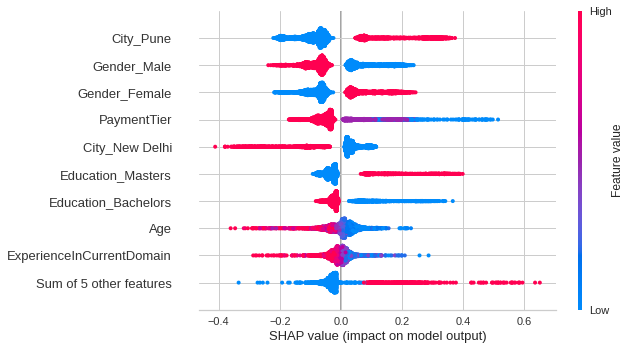

In [ ]:
 shap.plots.beeswarm(shap_values_log)

If the person is from pune is more likely to leave the company.

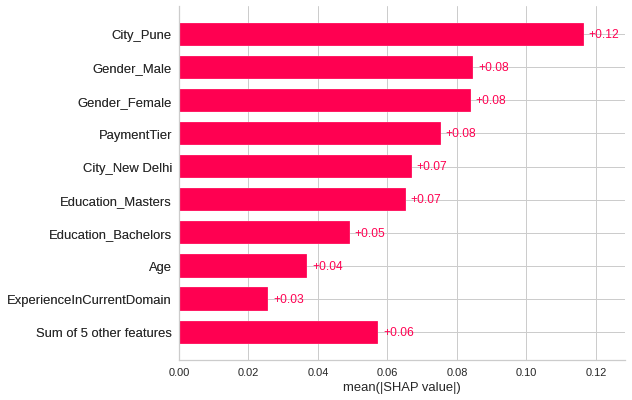

In [ ]:
shap.plots.bar(shap_values_log)

Here we are plotting the shap values.

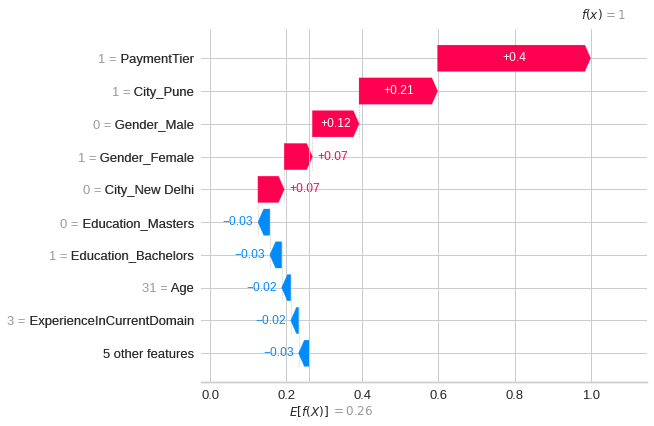

In [ ]:
shap.plots.waterfall(shap_values_log[sample_ind], max_display=10)

43% of employee may leave company because of PaymentTier. 15% of employees may leaving company because they belong fro

# Interpreting Decision Tree Model using SHAP

In [ ]:
# compute the SHAP values for the linear model
explainer_dt = shap.Explainer(dt.predict, X100)
shap_values_dt = explainer_dt(X)

Permutation explainer: 4654it [04:17, 17.30it/s]


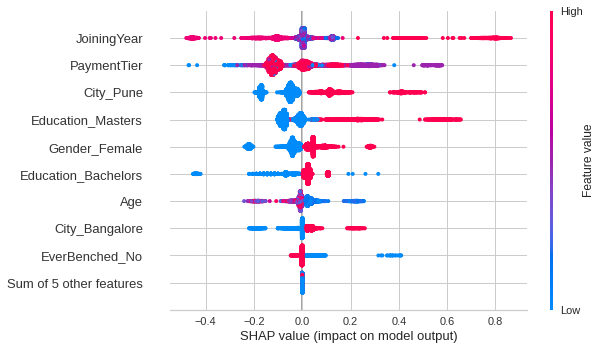

In [ ]:
shap.plots.beeswarm(shap_values_dt)

Accodring to the decesion tree JoiningYear impacts the most on wether the employee will leave or not the company. Payement Tier impacts second most according to the decesion tree.

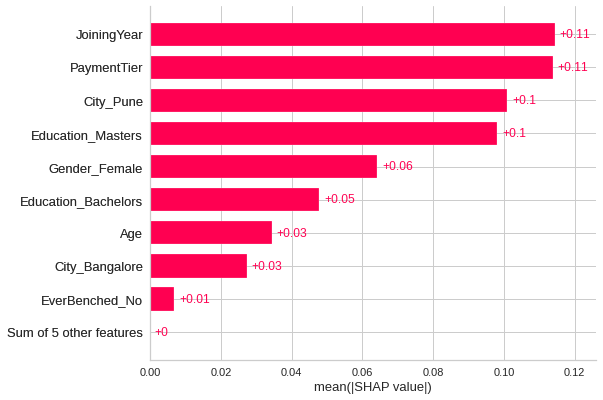

In [ ]:
shap.plots.bar(shap_values_dt)

We can see JoiningYear and PaymentTier impacting the most on the bra graph.

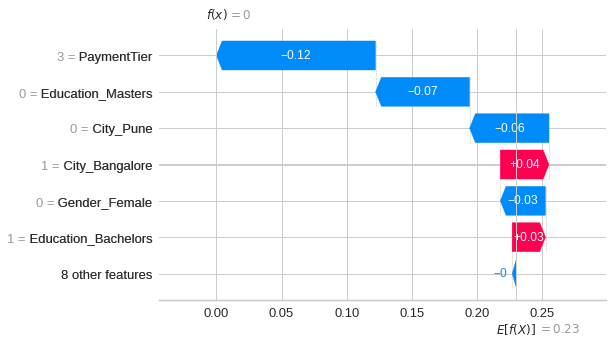

In [ ]:
shap.plots.waterfall(shap_values_dt[sample_ind], max_display=7)

Accordindly to waterfall plot above if the PaymentTier is 3 there is 12% less chance the employee will leave and if an employee has not done master's than 8 % chances are there that he will not leave. If a employee belongs to banglore than there 4% chance he will leave the company.

# Interpreting Best Tuned Model - Light GBM using SHAP

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=LGBMClassifier(bagging_fraction=0.5, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=1e-06, max_depth=-1,
               min_child_samples=1, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=90, n_jobs=-1, num_leaves=30, objective=None,
               random_state=7622, reg_alpha=0.01, reg_lambda=0.01,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


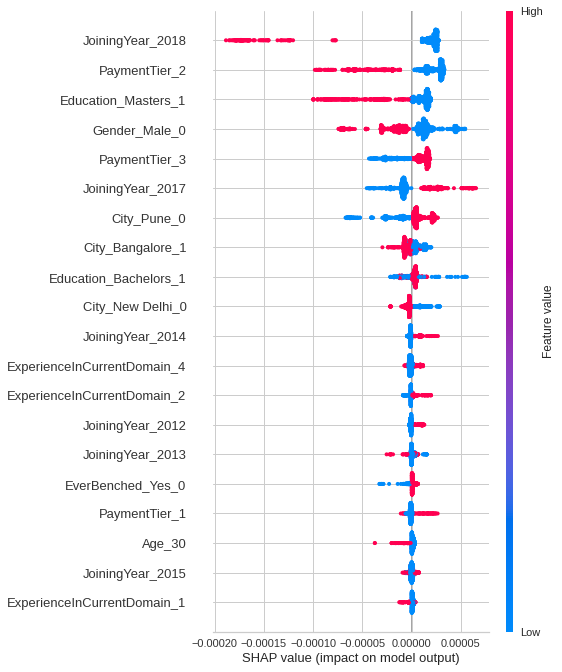

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_model)

After interpreting best tune model (Light GBM) the following feautures are important: JoiningYear_2018, Gender_Male_0, PaymentTier_2, Education_Masters_1, JoiningYear_2017, City_NewDelhi_1 and PaymentTier3.

# Conclusion
# 1. What is the question?

-> To Perform the following actions on the selected Dataset( Employee Future Prediction) 
* Data Cleaning, Preprocessing and Feature Engineering.
* Determine the best model using AutoML.
* Intepret the Model.

# 2. What did you do?
*  Did Data Cleaning, Preprocessing and Feature Engineering. 
1. Handled missing values
2. Checked the distribution of Predictors
3. Scaled the numerical variables
4. Identified important predictor variables
5. Performed Outlier detection & treatment

* Determined the best model using AutoML.
1. data preprocessing and preparation
2. build multiple ML models
3. evaluate the model performance
4. hyperparameter tuning
5. blend multiple models

* Intepreted the Model
1. Use SHAP Library to interpret the impact of predictor variables on employee future prediction

# 3. How well did it work?
* We performed used AutoML to determine and tune the best model.
* We got lomost 70 % prediction whether an employee will leave the company or not based on above methods.

# 4. What did you learn?
* If an employee has done Master will leave company than those who have only done undergrad. If the employee's location is Pune, he will leave the company compare to bangalore.

*Learned to perform Data Cleaning and Feature Selection. Applying and Evaluating different ML models. Use AutoML to automate Machine Learning Workflows. Use SHAP to interpret impact of predictor variables.
 

License
Copyright (c) 2022 Rahul-Kodate

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.